In [2]:
import numpy as np

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        self.w = None
        self.errors = []
        
    def fit(self, X, y):
        """
        X - [n_samples, n_features]
        y - [n_samples]
        """
        self.w = np.zeros(1 + X.shape[1])
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w[1:] += update * xi
                self.w[0] += update
                errors += int(update != 0.0)
            self.errors.append(errors)
        
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)

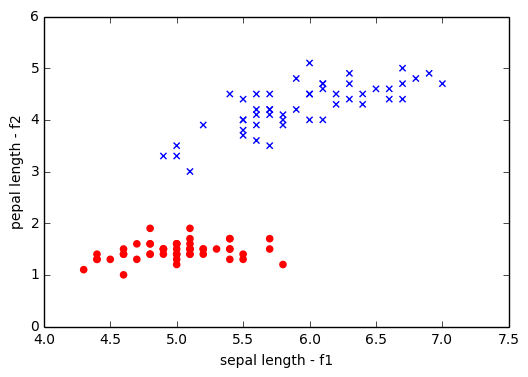

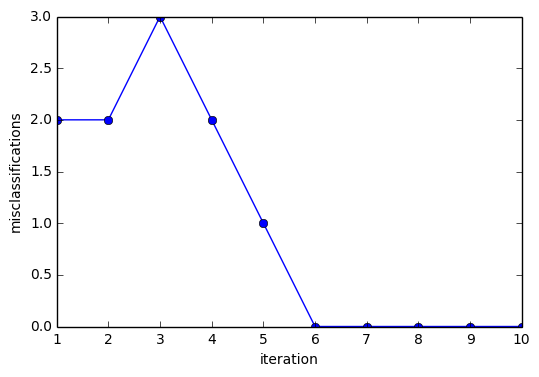

In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1) # labels for iris-setosa and iris-versicolor

X = df.iloc[0:100, [0, 2]].values # we are taking just 2 features

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length - f1')
plt.ylabel('pepal length - f2')
plt.show()

ppn = Perceptron(eta=0.1)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')
plt.xlabel('iteration')
plt.ylabel('misclassifications')